## Simple ChatBot

In [28]:
from typing_extensions import TypedDict
from langgraph.graph import StateGraph,START,END
from typing import Annotated
from langgraph.graph.message import add_messages

In [29]:
class State(TypedDict):
    messages: Annotated[list,add_messages]

In [30]:
import os
from dotenv import load_dotenv
load_dotenv()

os.environ["OPENAI_API_KEY"]=os.getenv("OPENAI_API_KEY")
os.environ["GROQ_API_KEY"]=os.getenv("GROQ_API_KEY")


In [31]:
from langchain_openai import ChatOpenAI
llm=ChatOpenAI(model="gpt-4o")
llm.invoke("Hello")

AIMessage(content='Hello! How can I assist you today?', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 9, 'prompt_tokens': 8, 'total_tokens': 17, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_e819e3438b', 'id': 'chatcmpl-CiEJ0IPzfYKWwdyCDwm08FxOvIV4h', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--bf14c917-ed92-4dda-bda9-4af90cb7ef10-0', usage_metadata={'input_tokens': 8, 'output_tokens': 9, 'total_tokens': 17, 'input_token_details': {'audio': 0, 'cache_read': 0}, 'output_token_details': {'audio': 0, 'reasoning': 0}})

In [23]:
from langchain_groq import ChatGroq
model=ChatGroq(model="openai/gpt-oss-20b")
model.invoke("Hello I am Harish I like to play Cricket")

AIMessage(content='Hi Harish! 👋 Great to meet someone who loves cricket. What do you enjoy most about the game—batting, bowling, fielding, or maybe following a particular team or league? Are you playing in a local club, or just enjoying it from the sidelines?', additional_kwargs={'reasoning_content': 'The user says: "Hello I am Harish I like to play Cricket". They are greeting and stating that they like cricket. We should respond with a friendly greeting, maybe ask about cricket, and keep conversation open. The user might want to talk about cricket. We can ask about what aspects they enjoy: batting, bowling, teams, etc. Also maybe ask if they play at local club or what level. We should be polite, supportive.'}, response_metadata={'token_usage': {'completion_tokens': 156, 'prompt_tokens': 81, 'total_tokens': 237, 'completion_time': 0.159267889, 'completion_tokens_details': {'reasoning_tokens': 91}, 'prompt_time': 0.050138385, 'prompt_tokens_details': None, 'queue_time': 0.052099465, 'to

In [33]:
def superbot(state:State):
    return {"messages":[llm.invoke(state["messages"])]}

In [34]:
graph=StateGraph(State)
#node
graph.add_node("superbot",superbot)
#edges

graph.add_edge(START, "superbot")
graph.add_edge("superbot", END)
graph_builder=graph.compile()

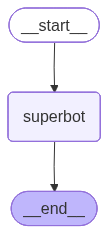

In [35]:
##Display
from IPython.display import Image,display
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [36]:
## Invocation

graph_builder.invoke({"messages":"Hello I am Harish I like to play Cricket"})

{'messages': [HumanMessage(content='Hello I am Harish I like to play Cricket', additional_kwargs={}, response_metadata={}, id='e107661c-14a0-4e52-9996-db1f2c3ee11b'),
  AIMessage(content="Hello Harish! It's great to hear that you enjoy playing cricket. Whether you're a batsman, bowler, or all-rounder, cricket is a fantastic sport that offers lots of excitement and team spirit. Do you have a favorite position you like to play or perhaps a favorite professional cricket team or player?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 62, 'prompt_tokens': 17, 'total_tokens': 79, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_e819e3438b', 'id': 'chatcmpl-CiEJIVemPl6oE7Y6uOJmpeTVZdsTk', 'service_tier': 

### Streaming the Responses

In [40]:
for event in graph_builder.stream({"messages":"Hello I am Harish I like to play Cricket"},stream_mode="updates"):
    print(event)

{'superbot': {'messages': [AIMessage(content="Hello Harish! It's great to hear that you enjoy playing cricket. It's a fantastic sport that involves skill, strategy, and teamwork. Do you play for a team, or do you enjoy playing casually with friends?", additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 43, 'prompt_tokens': 17, 'total_tokens': 60, 'completion_tokens_details': {'accepted_prediction_tokens': 0, 'audio_tokens': 0, 'reasoning_tokens': 0, 'rejected_prediction_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': 0, 'cached_tokens': 0}}, 'model_provider': 'openai', 'model_name': 'gpt-4o-2024-08-06', 'system_fingerprint': 'fp_e819e3438b', 'id': 'chatcmpl-CiESR34JtKhVGJjyQfVlqlTauJ3xy', 'service_tier': 'default', 'finish_reason': 'stop', 'logprobs': None}, id='lc_run--a0623de9-a2df-49a0-a77b-fbffeed2bceb-0', usage_metadata={'input_tokens': 17, 'output_tokens': 43, 'total_tokens': 60, 'input_token_details': {'audio': 0, 'cache_read': 0},